# Inpainting with Diffusion

Image inpainting is the task of reconstructing missing parts of an image with the help of context provided by the remaining parts of the image, and a prompt. In the real world, inpainting is commonly used in features like object removal and noise/damage removal.

Inpainting is the foundational tool used in creating the "infinite zoom" animation.

In this implementation, we make use of RunwayML's model for stable diffusion inpainting.

Installing the stablefused library via PIP.

In [ ]:
!pip install stablefused ipython

Importing required libraries.

In [ ]:
import numpy as np
import torch
import math
from IPython.display import Video, display
from PIL import Image
from stablefused import InpaintDiffusion
from stablefused.utils import image_grid, pil_to_video

Initialising the model.

In [ ]:
model_id = "runwayml/stable-diffusion-inpainting"
model = InpaintDiffusion(model_id=model_id, torch_dtype=torch.float16)
model.enable_attention_slicing()
model.enable_slicing()
model.enable_tiling()

Defining our prompt(s), negative prompt(s), number of output images and seed.

The prompt tells the model what to replace the missing portions of the image with, and the negative prompt tells the model what _not_ to replace the missing portions with.

While the same seed is used, a constant combination of prompt, negative prompt, image and mask will result in the same output every time.

In [ ]:
prompt = [
    "Digital illustration of a mythical creature, high quality, realistic, 8k",
    "Digital illustration of mythical creatures, high quality, realistic, 8k",
    "Digital illustration of a dragon, high quality, realistic, 8k",
    "Digital illustration of a ferocious lion, high quality, realistic, 8k",
]
negative_prompt = "cartoon, unrealistic, blur, boring background, deformed, disfigured, low resolution, unattractive"
num_images = len(prompt)
seed = 42

torch.manual_seed(seed)
np.random.seed(seed)

Loading the original image and the mask into the notebook. The mask contains black and white pixels. The blackened portion represents the parts where information is retained, and the white portion represents the parts where inpainting is to be done.

Image and Prompt credits: https://mspoweruser.com/best-stable-diffusion-prompts/#7_Samurai_and_the_Mystical

##### Image

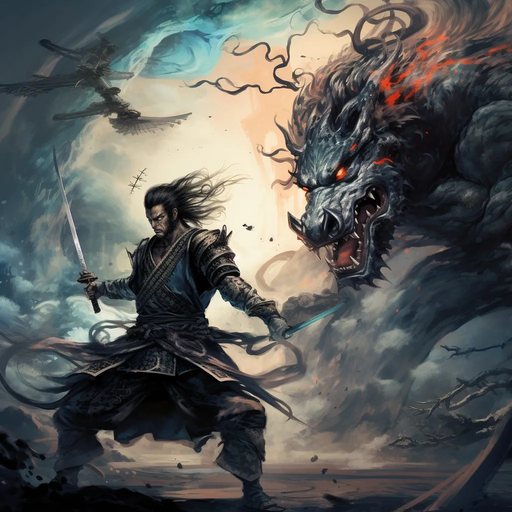

##### Mask

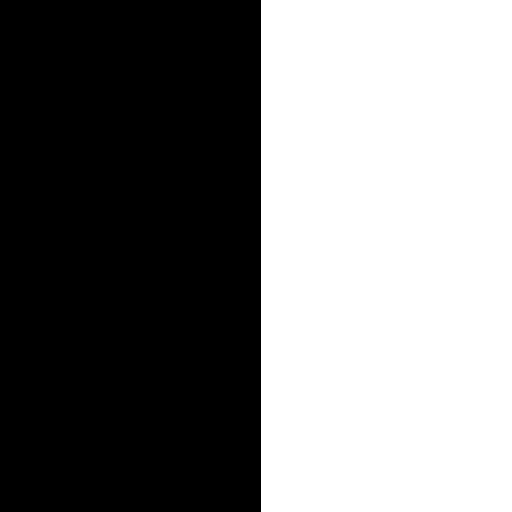

In [ ]:
image_filename = "mechanical-robot-base-image.png"
mask_filename = "mask.png"

original_image = Image.open(image_filename)
mask = Image.open(mask_filename)

start_image = np.array(original_image.convert("RGB"))
mask_image = np.array(mask.convert("L"))

start_image = np.expand_dims(start_image, axis=0).repeat(num_images, axis=0)
mask_image = np.expand_dims(mask_image, axis=0).repeat(num_images, axis=0)
mask_image = mask_image.reshape(*mask_image.shape, 1)

print("Original and mask image:")
image_grid([original_image, mask], rows=1, cols=2)

Running the model on the given image, mask and prompts.

In [ ]:
images = model(
    prompt=prompt,
    negative_prompt=[negative_prompt] * num_images,
    image=start_image,
    mask=mask_image,
    num_inference_steps=20,
    start_step=5,
    image_height=512,
    image_width=512,
    guidance_scale=10.0,
)

Displaying the images in a grid:

In [ ]:
image_grid(images, rows=2, cols=math.ceil(num_images / 2))